## This Notebook covers:
- Automated feature Engineering using feature tools
- Creating classification models 
- Calculating model performance on the features developed with Automated Feature Engineering
- Confusion matrix and Error metrices calculations
- Summarization of Results at the end


In [32]:
# Importing Libraries
import featuretools as ft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [33]:
# Reading the dataset
dataset_columns_with_data=pd.read_csv('../../Data/clean_profile_data_all.csv')

In [34]:
dataset_columns_with_data['index']=np.arange(0,len(dataset_columns_with_data))

In [35]:
dataset_columns_with_data.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking,index
0,316,164,152,106.0,2.90,9,3,northeastern_university,accept,15,0
1,314,163,151,114.0,3.53,7,3,northeastern_university,accept,15,1
2,307,160,147,88.0,3.00,36,0,northeastern_university,accept,15,2
3,330,169,161,113.0,2.40,48,3,northeastern_university,accept,15,3
4,316,163,153,99.0,2.71,30,0,northeastern_university,accept,15,4


In [36]:
# creating an entity set 'es'
decisions=dataset_columns_with_data.pop('status')
es = ft.EntitySet(id = 'admissions_data')

# adding a dataframe
es.entity_from_dataframe(entity_id = 'admissions_data', dataframe = dataset_columns_with_data, index = 'index')

Entityset: admissions_data
  Entities:
    admissions_data [Rows: 9350, Columns: 10]
  Relationships:
    No relationships

In [37]:
es.normalize_entity(base_entity_id='admissions_data', new_entity_id='university_class', index = 'university_name',
additional_variables = ['ranking'])

Entityset: admissions_data
  Entities:
    admissions_data [Rows: 9350, Columns: 9]
    university_class [Rows: 29, Columns: 2]
  Relationships:
    admissions_data.university_name -> university_class.university_name

In [38]:
feature_matrix, feature_names = ft.dfs(entityset=es,target_entity = 'admissions_data',max_depth = 2,verbose = 1,n_jobs = 3)

Built 52 features
EntitySet scattered to workers in 5.194 seconds
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 10/10 chunks


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:54059 remote=tcp://127.0.0.1:54027>


In [39]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9350 entries, 0 to 9349
Data columns (total 52 columns):
gre_score                                                       9350 non-null int64
gre_score_quant                                                 9350 non-null int64
gre_score_verbal                                                9350 non-null int64
test_score_toefl                                                9350 non-null float64
undergraduation_score                                           9350 non-null float64
work_ex                                                         9350 non-null int64
papers_published                                                9350 non-null int64
university_name                                                 9350 non-null object
university_class.ranking                                        9350 non-null int64
university_class.SUM(admissions_data.gre_score)                 9350 non-null int64
university_class.SUM(admissions_data.gre_score_q

In [40]:
feature_matrix.to_csv('../../Data/feature_matrix.csv')

In [41]:
feature_matrix.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,university_class.ranking,university_class.SUM(admissions_data.gre_score),...,university_class.MIN(admissions_data.work_ex),university_class.MIN(admissions_data.papers_published),university_class.MEAN(admissions_data.gre_score),university_class.MEAN(admissions_data.gre_score_quant),university_class.MEAN(admissions_data.gre_score_verbal),university_class.MEAN(admissions_data.test_score_toefl),university_class.MEAN(admissions_data.undergraduation_score),university_class.MEAN(admissions_data.work_ex),university_class.MEAN(admissions_data.papers_published),university_class.COUNT(admissions_data)
index,,,,,,,,,,,,,,,,,,,,,
0,316,164,152,106.0,2.90,9,3,northeastern_university,15,518554,...,0,0,313.704779,162.431942,151.272837,97.344223,2.941785,17.15608,0.741077,1653
1,314,163,151,114.0,3.53,7,3,northeastern_university,15,518554,...,0,0,313.704779,162.431942,151.272837,97.344223,2.941785,17.15608,0.741077,1653
2,307,160,147,88.0,3.00,36,0,northeastern_university,15,518554,...,0,0,313.704779,162.431942,151.272837,97.344223,2.941785,17.15608,0.741077,1653
3,330,169,161,113.0,2.40,48,3,northeastern_university,15,518554,...,0,0,313.704779,162.431942,151.272837,97.344223,2.941785,17.15608,0.741077,1653
4,316,163,153,99.0,2.71,30,0,northeastern_university,15,518554,...,0,0,313.704779,162.431942,151.272837,97.344223,2.941785,17.15608,0.741077,1653


In [42]:
numerical_data = feature_matrix.select_dtypes(include = ['int64','float','uint8'])
categorical_data = feature_matrix.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
print('========================','These are the list of numerical features :','========================')
for num_fea in numerical_features:
    print(num_fea,",", end=" ")

======================== These are the list of numerical features : ========================
gre_score , gre_score_quant , gre_score_verbal , test_score_toefl , undergraduation_score , work_ex , papers_published , university_class.ranking , university_class.SUM(admissions_data.gre_score) , university_class.SUM(admissions_data.gre_score_quant) , university_class.SUM(admissions_data.gre_score_verbal) , university_class.SUM(admissions_data.test_score_toefl) , university_class.SUM(admissions_data.undergraduation_score) , university_class.SUM(admissions_data.work_ex) , university_class.SUM(admissions_data.papers_published) , university_class.STD(admissions_data.gre_score) , university_class.STD(admissions_data.gre_score_quant) , university_class.STD(admissions_data.gre_score_verbal) , university_class.STD(admissions_data.test_score_toefl) , university_class.STD(admissions_data.undergraduation_score) , university_class.STD(admissions_data.work_ex) , university_class.STD(admissions_data.paper

In [43]:
print('========================','These are the list of categorical features :','========================')
for cat_fea in categorical_features:
    print(cat_fea, end=" ")

======================== These are the list of categorical features : ========================
university_name 

In [44]:
# One hot encoing features
def onehotencoder(dataset_columns_with_data,column):
    return feature_matrix.drop(columns=column).join(pd.get_dummies(feature_matrix[column],drop_first=True))
#replacing nominal categorical features with numeric data using one hot encoding technique
for feature in ['university_name']:
    feature_matrix1_with_numerics = onehotencoder(feature_matrix,feature)

In [45]:
feature_matrix1_with_numerics.dropna(axis=1,inplace=True)

In [46]:
feature_matrix1_with_numerics.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_class.ranking,university_class.SUM(admissions_data.gre_score),university_class.SUM(admissions_data.gre_score_quant),...,university_of_connecticut,university_of_florida,university_of_iowa,university_of_maryland_college_park,university_of_north_carolina_at_charlotte,university_of_southern_california,university_of_texas_arlington,university_of_texas_austin,university_of_texas_dallas,worcester_polytechnic_institute
index,,,,,,,,,,,,,,,,,,,,,
0,316,164,152,106.0,2.90,9,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,0
1,314,163,151,114.0,3.53,7,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,0
2,307,160,147,88.0,3.00,36,0,15,518554,268500,...,0,0,0,0,0,0,0,0,0,0
3,330,169,161,113.0,2.40,48,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,0
4,316,163,153,99.0,2.71,30,0,15,518554,268500,...,0,0,0,0,0,0,0,0,0,0


In [47]:
numerical_data = feature_matrix1_with_numerics.select_dtypes(include = ['int64','float','uint8'])
categorical_data = feature_matrix1_with_numerics.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [48]:
feature_matrix1_with_numerics=feature_matrix1_with_numerics.join(decisions)

In [49]:
feature_matrix1_with_numerics.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_class.ranking,university_class.SUM(admissions_data.gre_score),university_class.SUM(admissions_data.gre_score_quant),...,university_of_florida,university_of_iowa,university_of_maryland_college_park,university_of_north_carolina_at_charlotte,university_of_southern_california,university_of_texas_arlington,university_of_texas_austin,university_of_texas_dallas,worcester_polytechnic_institute,status
index,,,,,,,,,,,,,,,,,,,,,
0,316,164,152,106.0,2.90,9,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,accept
1,314,163,151,114.0,3.53,7,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,accept
2,307,160,147,88.0,3.00,36,0,15,518554,268500,...,0,0,0,0,0,0,0,0,0,accept
3,330,169,161,113.0,2.40,48,3,15,518554,268500,...,0,0,0,0,0,0,0,0,0,accept
4,316,163,153,99.0,2.71,30,0,15,518554,268500,...,0,0,0,0,0,0,0,0,0,accept


## USING LOGISTIC REGRESSION MODEL AND COMPUTING ERROR METRICES

In [50]:
from sklearn.model_selection import train_test_split

# splitting train data into training and test data (Split 80:20)
train, test = train_test_split(feature_matrix1_with_numerics, test_size=0.20, random_state=5, stratify=feature_matrix1_with_numerics[['status']])
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train[numerical_features], train['status'])
clf.score(test[numerical_features], test['status'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6133689839572193

In [51]:
predicted = clf.predict(test[numerical_features])

<b> Error metric calculation using confusion matrix </b>

In [52]:
train_cm = confusion_matrix(train['status'], clf.predict(train[numerical_features]),labels=['accept','reject'])
train_cm

array([[1801, 1677],
       [1103, 2899]], dtype=int64)

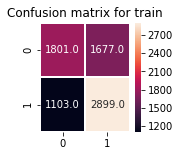

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(train_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.title('Confusion matrix for train')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
test_cm = confusion_matrix(test['status'], predicted,labels=['accept','reject'])
test_cm

array([[418, 451],
       [272, 729]], dtype=int64)

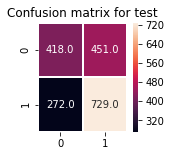

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.title('Confusion matrix for test')
plt.show()

In [56]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Summarization of the Accuracy Score for Test and Train')
print('-------------------------------------------------------')
test_accuracy = accuracy_score(test['status'], predicted)
print('test_accuracy:',test_accuracy)
train_accuracy = accuracy_score(train['status'], clf.predict(train[numerical_features]))
print('train_accuracy:',train_accuracy)
from sklearn.metrics import f1_score
test_f1_score = f1_score(test['status'], predicted,pos_label='accept')
print('test_f1_score:',test_f1_score)
train_f1_score = f1_score(train['status'], clf.predict(train[numerical_features]),pos_label='accept')
print('train_f1_score:',train_f1_score)

Summarization of the Accuracy Score for Test and Train
-------------------------------------------------------
test_accuracy: 0.6133689839572193
train_accuracy: 0.6283422459893048
test_f1_score: 0.5362411802437459
train_f1_score: 0.564399874647446


In [57]:
prob_test=pd.DataFrame(clf.predict_proba(test[numerical_features]))

In [58]:
prob_train=pd.DataFrame(clf.predict_proba(train[numerical_features]))

In [59]:
clf.predict(test[numerical_features])

array(['reject', 'accept', 'reject', ..., 'accept', 'reject', 'accept'],
      dtype=object)

<b> AUC ROC Curve for train and test </b>

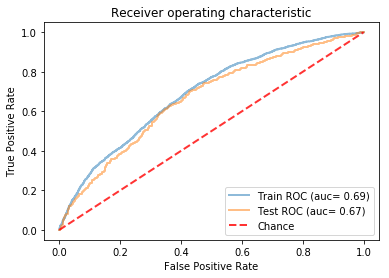

In [60]:

import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test['status'], prob_test[0],pos_label='accept')
test_roc_auc = auc(test_fpr, test_tpr)
train_fpr,train_tpr,train_thresholds = metrics.roc_curve(train['status'], prob_train[0],pos_label='accept')
train_roc_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
             label='Train ROC (auc= %0.2f)' % (train_roc_auc))
plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
             label='Test ROC (auc= %0.2f)' % (test_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## USING RANDOM FOREST CLASSIFIER MODEL AND COMPUTING ERROR METRICES

In [61]:
from sklearn.model_selection import train_test_split

# splitting train data into training and test data (Split 80:20)
train, test = train_test_split(feature_matrix1_with_numerics, test_size=0.30, random_state=5, stratify=feature_matrix1_with_numerics[['status']])
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier().fit(train[numerical_features], train['status'])
rand_clf.score(test[numerical_features], test['status'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7073083778966132

In [62]:
rand_predicted = rand_clf.predict(test[numerical_features])

<b> Error metric calculation using confusion matrix </b>

In [63]:
train_cm = confusion_matrix(train['status'], rand_clf.predict(train[numerical_features]),labels=['accept','reject'])
train_cm

array([[3019,   24],
       [  71, 3431]], dtype=int64)

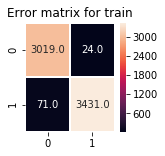

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(train_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.title('Error matrix for train')
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix
test_cm = confusion_matrix(test['status'], rand_predicted,labels=['accept','reject'])
test_cm

array([[ 934,  370],
       [ 451, 1050]], dtype=int64)

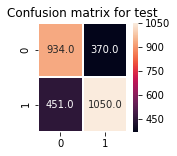

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.title('Confusion matrix for test')
plt.show()

In [67]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Summarization of the Accuracy Score for Test and Train')
print('-------------------------------------------------------')
test_accuracy = accuracy_score(test['status'], rand_predicted)
print('test_accuracy:',test_accuracy)
train_accuracy = accuracy_score(train['status'], rand_clf.predict(train[numerical_features]))
print('train_accuracy:',train_accuracy)
from sklearn.metrics import f1_score
test_f1_score = f1_score(test['status'], rand_predicted,pos_label='accept')
print('test_f1_score:',test_f1_score)
train_f1_score = f1_score(train['status'], rand_clf.predict(train[numerical_features]),pos_label='accept')
print('train_f1_score:',train_f1_score)

Summarization of the Accuracy Score for Test and Train
-------------------------------------------------------
test_accuracy: 0.7073083778966132
train_accuracy: 0.985485103132162
test_f1_score: 0.6946820379323169
train_f1_score: 0.9845100277188977


In [68]:
prob_test=pd.DataFrame(rand_clf.predict_proba(test[numerical_features]))

In [69]:
prob_train=pd.DataFrame(rand_clf.predict_proba(train[numerical_features]))

In [70]:
rand_clf.predict(test[numerical_features])

array(['reject', 'reject', 'accept', ..., 'accept', 'accept', 'accept'],
      dtype=object)

<b> AUC ROC Curve for train and test </b>

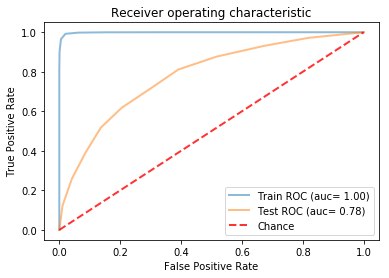

In [71]:
#test and train roc
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test['status'], prob_test[0],pos_label='accept')
test_roc_auc = auc(test_fpr, test_tpr)
train_fpr,train_tpr,train_thresholds = metrics.roc_curve(train['status'], prob_train[0],pos_label='accept')
train_roc_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
             label='Train ROC (auc= %0.2f)' % (train_roc_auc))
plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
             label='Test ROC (auc= %0.2f)' % (test_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<b> Summarization of the Automated feature Engineering using Feature Tools</b>

- Featuretools is an open source library for performing automated feature engineering
- Three major components of the package : Entities, Deep Feature Synthesis (DFS), Feature primitives

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Train Accuracy</th> 
    <th>Test Accuracy</th>
    <th>F1 Score - Train</th> 
    <th>F1 Score - Test</th>
    <th>AUC-ROC Curve - Test</th>
    <th>AUC-ROC Curve - Train</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.63</td> 
    <td>0.61</td>
    <td>0.56</td> 
    <td>0.53</td>
    <td>0.67</td> 
    <td>0.69</td>
  </tr>
  <tr>
    <td>Random Forest CLassifier</td>
    <td>0.98</td> 
    <td>0.71</td>
    <td>0.98</td> 
    <td>0.70</td>
    <td>0.78</td> 
    <td>1.0</td>
  </tr>
</table>